In [1]:
from fastai.vision import *

In [2]:
directory = 'dataset'
path = Path(directory)

In [3]:
bs = 32
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
        ds_tfms=get_transforms(), size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

In [4]:
data.classes

['Attire', 'Decorationandsignage', 'Food', 'misc']

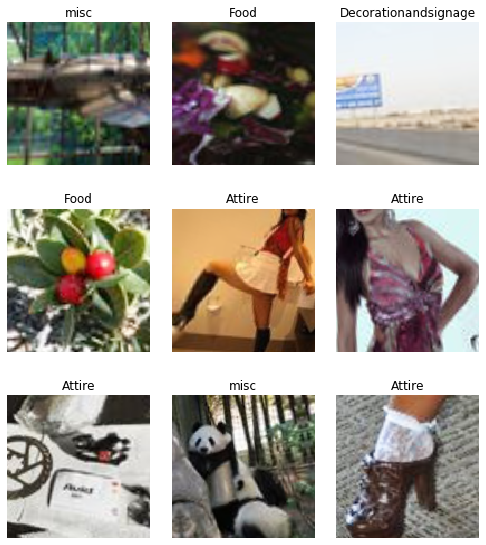

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))

In [7]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,f_beta,time
0,1.141821,0.881509,0.742692,02:00
1,0.960210,0.700101,0.780674,01:54
2,0.666026,0.569712,0.800761,01:55
3,0.614924,0.550367,0.825906,01:55
4,0.541856,0.537226,0.822057,01:54
5,0.480111,0.499007,0.834998,01:55
6,0.447260,0.513873,0.832639,01:55
7,0.379748,0.489685,0.840453,01:52
8,0.355315,0.472151,0.845830,01:51
9,0.279393,0.494411,0.842968,01:50


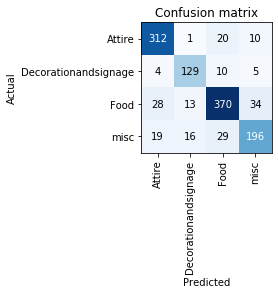

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [9]:
learn.save('resnet152-1')
learn.export()

In [1]:
from fastai.vision import *

In [2]:
directory = 'dataset'
path = Path(directory)

In [3]:
bs = 32
stage = 2
steps = 40

print('Loop : ', 0)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
        ds_tfms=get_transforms(), size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))
learn.fit_one_cycle(1)
learn.save('loop_models/stage-' + str(stage))

for i in range(1, steps):
    print('Loop : ', i)
    data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, 
        ds_tfms=get_transforms(), size=128, bs=bs, num_workers=4).normalize(imagenet_stats)

    learn = cnn_learner(data, models.resnet152, metrics=FBeta(average='weighted', beta=1))
    model_path = 'loop_models/stage-' + str(stage)
    learn.load(model_path)
    learn.fit_one_cycle(1)
    learn.save('loop_models/stage-' + str(stage))

Loop :  0


epoch,train_loss,valid_loss,f_beta,time
0,0.215622,0.066449,0.977438,01:47


Loop :  1


Loop :  2


Loop :  3


Loop :  4


Loop :  5


Loop :  6


Loop :  7


Loop :  8


Loop :  9


Loop :  10


Loop :  11


Loop :  12


Loop :  13


Loop :  14


Loop :  15


Loop :  16


Loop :  17


Loop :  18


Loop :  19


Loop :  20


Loop :  21


Loop :  22


Loop :  23


Loop :  24


Loop :  25


Loop :  26


Loop :  27


Loop :  28


Loop :  29


Loop :  30


Loop :  31


Loop :  32


Loop :  33


Loop :  34


Loop :  35


Loop :  36


Loop :  37


Loop :  38


Loop :  39


In [4]:
learn.save('final-1')

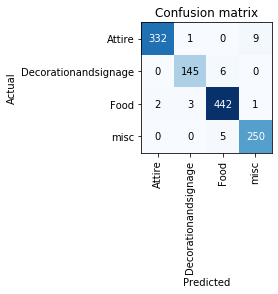

In [5]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [6]:
learn.export()